In [ ]:
###############################
#Script for creating average pathway coverages of DeepProfile vs other methods
###############################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
    

/homes/gws/abdincer/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Define cancer types
cancer_types =  ['BRCA', 'AML', 
                'COLON', 'LUNG', 
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'SKIN', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD_NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

cancer_names = ['BREAST', 'AML',
                'COLORECTAL', 'LUNG',
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'MELANOMA', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD&NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

#Define methods
methods = [ 'RP', 'PCA', 'ICA', 'AE', 'DAE', 'DeepProfile']
run_ranges = [(1, 10), (1, 2), (1, 10), (0, 9), (0, 9), (1, 2)]

In [3]:
def createPlot(pathway_type):
    #Record all scores
    score_means = np.zeros((len(methods), len(cancer_types)))
    score_variances = np.zeros((len(methods), len(cancer_types)))
    
    for c in range(len(cancer_types)):

        cancer_type = cancer_types[c]
        print("***************************************")
        print(cancer_type)

        input_folder = '../../ALL_CANCER_FILES/' + cancer_type + '/PATHWAY_FILES/'
        for m in range(len(methods)):
            
            method = methods[m]
            results = []
            for run in range(run_ranges[m][0], run_ranges[m][1]):
                print(run)
                df = pd.read_table(input_folder + cancer_type + '_FISHER_FDR_CORRECTED_PVALS_' + 
                                   pathway_type + '_' + method + '_' + str(run) + '.tsv', index_col = 0)
                print("Dataframe ", df.shape)
                
                significant_pws = np.where([df.values < 0.05])[2]
                average_count = len((significant_pws)) / 150
                results.append(average_count)
                
            score_means[m, c] = np.mean(results)
            score_variances[m, c] = np.std(results)
        
      
    #Create plots 
    mpl.rcParams['axes.linewidth'] = 5
    fig, ax = plt.subplots()
    fig.set_size_inches(100, 20)
    
    SMALL_SIZE = 170
    MEDIUM_SIZE = 200
    BIGGER_SIZE = 350
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    colors =['#9999ff', '#ff9933', '#2eb8b8', 
             '#ff9999', '#99ccff','#ff4d4d']
    
    colors = ['#6a89cc', '#f6b93b', '#38ada9', '#fa983a',  '#82ccdd','#e55039']
    
    #Create multiple barplot
    plots = []
    for i in range(len(methods)):
        plot = ax.bar( np.arange(len(cancer_types)) + i * 0.12 + 0.01 * i, 
                      score_means[i, :], 0.15, color=colors[i], zorder = 10)
        plots.append(plot)
    
    plt.ylabel('Average number of pathways')
    #plt.xticks( np.arange(len(cancer_types)) + 1.5 * 0.1, (cancer_names))
    plt.ylabel('')
    plt.xticks( np.arange(len(cancer_types)) + 1.5 * 0.1, [])
    plt.title(pathway_type.replace('_', ' '), weight = 'bold')
    #plt.xticks([])
    plt.yticks(np.arange(0, 40, step = 10))
    plt.xticks(rotation=45)
    method_names = ['RP', 'PCA', 'ICA', 'AE', 'DAE', 'DeepProfile']
    #plt.legend(plots, method_names, ncol= 6, loc='upper center')
    
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.box(False)
    plt.gca().yaxis.grid(which="major", color='#8c8c8c', linestyle='-', linewidth=5)
    plt.show()
    
    score_means = pd.DataFrame(score_means, 
                               columns = cancer_names,
                               index = methods)
    return score_means

***************************************
BRCA
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Dataframe  (150, 1077)
0
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
0
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
*****

Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Dataframe  (150, 1077)
0
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
0
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
***************************************
STOMACH
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Da

Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
0
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
***************************************
BLADDER
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
1
Dataframe  (150, 1077)
2
Dataframe  (150, 1077)
3
Dataframe  (150, 1077)
4
Dataframe  (150, 1077)
5
Dataframe  (150, 1077)
6
Dataframe  (150, 1077)
7
Dataframe  (150, 1077)
8
Dataframe  (150, 1077)
9
Dataframe  (150, 1077)
0
Da

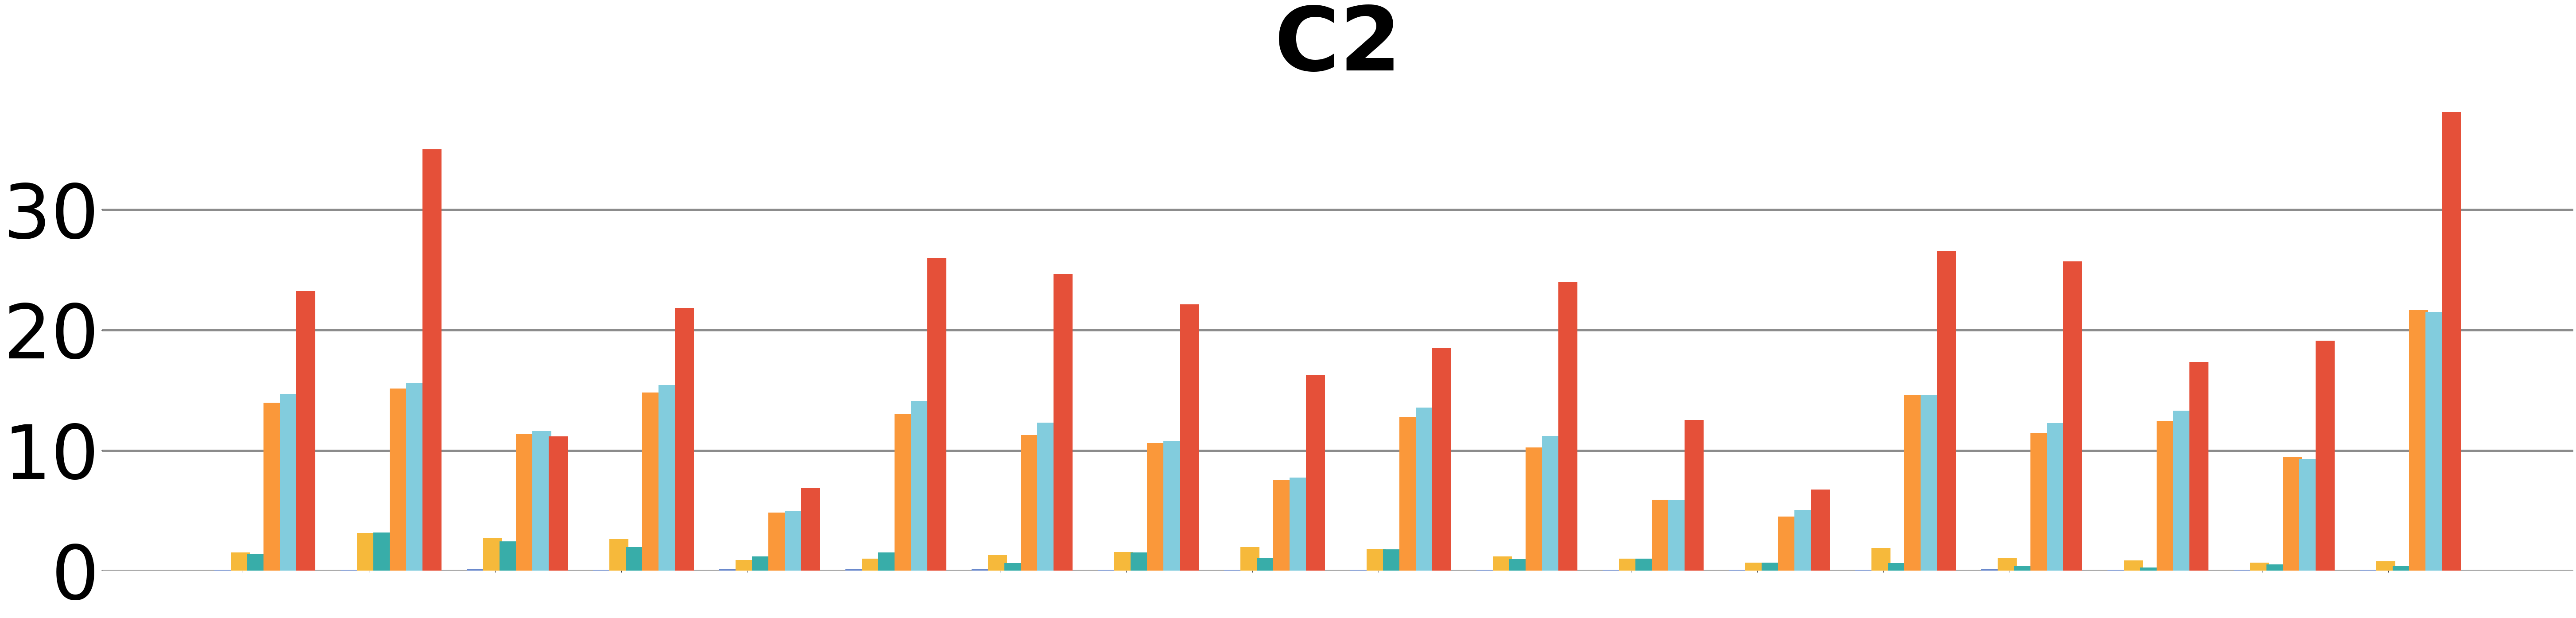

,BREAST,AML,COLORECTAL,LUNG,BRAIN,OV,SARCOMA,KIDNEY,LIVER,STOMACH,MELANOMA,PROSTATE,THYROID,UTERINE,HEAD&NECK,PANCREAS,CERVICAL,BLADDER
RP,0.075556,0.071111,0.118519,0.072593,0.119259,0.160000,0.132593,0.099259,0.069630,0.080741,0.074815,0.087407,0.066667,0.066667,0.108148,0.092593,0.084444,0.066667
PCA,1.526667,3.146667,2.733333,2.606667,0.886667,1.020000,1.313333,1.566667,1.946667,1.826667,1.173333,1.000000,0.673333,1.880000,1.053333,0.846667,0.673333,0.800000
ICA,1.405185,3.158519,2.429630,1.957037,1.201481,1.510370,0.625926,1.530370,1.023704,1.794815,0.975556,1.013333,0.685926,0.641481,0.376296,0.257778,0.537778,0.382222
AE,13.946667,15.141481,11.337037,14.803704,4.817037,13.006667,11.267407,10.594815,7.569630,12.789630,10.245926,5.912593,4.486667,14.598519,11.418519,12.446667,9.486667,21.660000
DAE,14.660741,15.571852,11.620741,15.414815,4.991111,14.088148,12.321481,10.812593,7.729630,13.570370,11.214074,5.853333,5.060741,14.625926,12.272593,13.296296,9.282222,21.513333
DeepProfile,23.240000,35.020000,11.173333,21.833333,6.900000,25.966667,24.633333,22.126667,16.233333,18.486667,24.020000,12.526667,6.753333,26.533333,25.700000,17.346667,19.120000,38.106667


In [7]:
result_df = createPlot('C2')
result_df

In [8]:
sub_df = result_df - result_df.loc['DeepProfile']
print(sub_df)
print(np.where(sub_df.values.flatten() > 0))

from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count = 88, 
                  nobs = 90, 
                  value = 0.5, 
                  alternative = 'larger')

                BREAST        AML  COLORECTAL       LUNG     BRAIN         OV  \
RP          -23.164444 -34.948889  -11.054815 -21.760741 -6.780741 -25.806667   
PCA         -21.713333 -31.873333   -8.440000 -19.226667 -6.013333 -24.946667   
ICA         -21.834815 -31.861481   -8.743704 -19.876296 -5.698519 -24.456296   
AE           -9.293333 -19.878519    0.163704  -7.029630 -2.082963 -12.960000   
DAE          -8.579259 -19.448148    0.447407  -6.418519 -1.908889 -11.878519   
DeepProfile   0.000000   0.000000    0.000000   0.000000  0.000000   0.000000   

               SARCOMA     KIDNEY      LIVER    STOMACH   MELANOMA   PROSTATE  \
RP          -24.500741 -22.027407 -16.163704 -18.405926 -23.945185 -12.439259   
PCA         -23.320000 -20.560000 -14.286667 -16.660000 -22.846667 -11.526667   
ICA         -24.007407 -20.596296 -15.209630 -16.691852 -23.044444 -11.513333   
AE          -13.365926 -11.531852  -8.663704  -5.697037 -13.774074  -6.614074   
DAE         -12.311852 -11.

(30.749168503170328, 6.272413389882242e-208)

In [9]:
def createPlot(pathway_type):
    #Record all scores
    score_means = np.zeros((len(methods), len(cancer_types)))
    score_variances = np.zeros((len(methods), len(cancer_types)))
    
    for c in range(len(cancer_types)):

        cancer_type = cancer_types[c]
        print("***************************************")
        print(cancer_type)

        input_folder = '../../ALL_CANCER_FILES/' + cancer_type + '/PATHWAY_FILES/'
        for m in range(len(methods)):
            
            method = methods[m]
            results = []
            for run in range(run_ranges[m][0], run_ranges[m][1]):
                print(run)
                df = pd.read_table(input_folder + cancer_type + '_FISHER_FDR_CORRECTED_PVALS_' + 
                                   pathway_type + '_' + method + '_' + str(run) + '.tsv', index_col = 0)
                print("Dataframe ", df.shape)
                
                significant_pws = np.where([df.values < 0.05])[2]
                average_count = len((significant_pws)) / 150
                results.append(average_count)
                
            score_means[m, c] = np.mean(results)
            score_variances[m, c] = np.std(results)
        
      
    #Create plots 
    mpl.rcParams['axes.linewidth'] = 5
    fig, ax = plt.subplots()
    fig.set_size_inches(100, 20)
    
    SMALL_SIZE = 170
    MEDIUM_SIZE = 200
    BIGGER_SIZE = 350
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    colors =['#9999ff', '#ff9933', '#2eb8b8', 
             '#ff9999', '#99ccff','#ff4d4d']
    
    colors = ['#6a89cc', '#f6b93b', '#38ada9', '#fa983a',  '#82ccdd','#e55039']
    
    #Create multiple barplot
    plots = []
    for i in range(len(methods)):
        plot = ax.bar( np.arange(len(cancer_types)) + i * 0.12 + 0.01 * i, 
                      score_means[i, :], 0.15, color=colors[i], zorder = 10)
        plots.append(plot)
    
    plt.ylabel('Average number of pathways')
    #plt.xticks( np.arange(len(cancer_types)) + 1.5 * 0.1, (cancer_names))
    plt.ylabel('')
    plt.xticks( np.arange(len(cancer_types)) + 1.5 * 0.1, [])
    plt.title(pathway_type.replace('_', ' '), weight = 'bold')
    #plt.xticks([])
    plt.yticks(np.arange(0, 14, step = 2))
    plt.xticks(rotation=45)
    method_names = ['RP', 'PCA', 'ICA', 'AE', 'DAE', 'DeepProfile']
    #plt.legend(plots, method_names, ncol= 6, loc='upper center')
    
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.box(False)
    plt.gca().yaxis.grid(which="major", color='#8c8c8c', linestyle='-', linewidth=5)
    plt.show()
    
    score_means = pd.DataFrame(score_means, 
                               columns = cancer_names,
                               index = methods)
    return score_means

***************************************
BRCA
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
1
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
1
Dataframe  (150, 189)
***************************************
AML

Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
1
Dataframe  (150, 189)
***************************************
STOMACH
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
1
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150,

Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
1
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
9
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
0
Dataframe  (150, 189)
1
Dataframe  (150, 189)
2
Dataframe  (150, 189)
3
Dataframe  (150, 189)
4
Dataframe  (150, 189)
5
Dataframe  (150, 189)
6
Dataframe  (150, 189)
7
Dataframe  (150, 189)
8
Dataframe  (150, 189)
1
Dataframe  (150, 189)


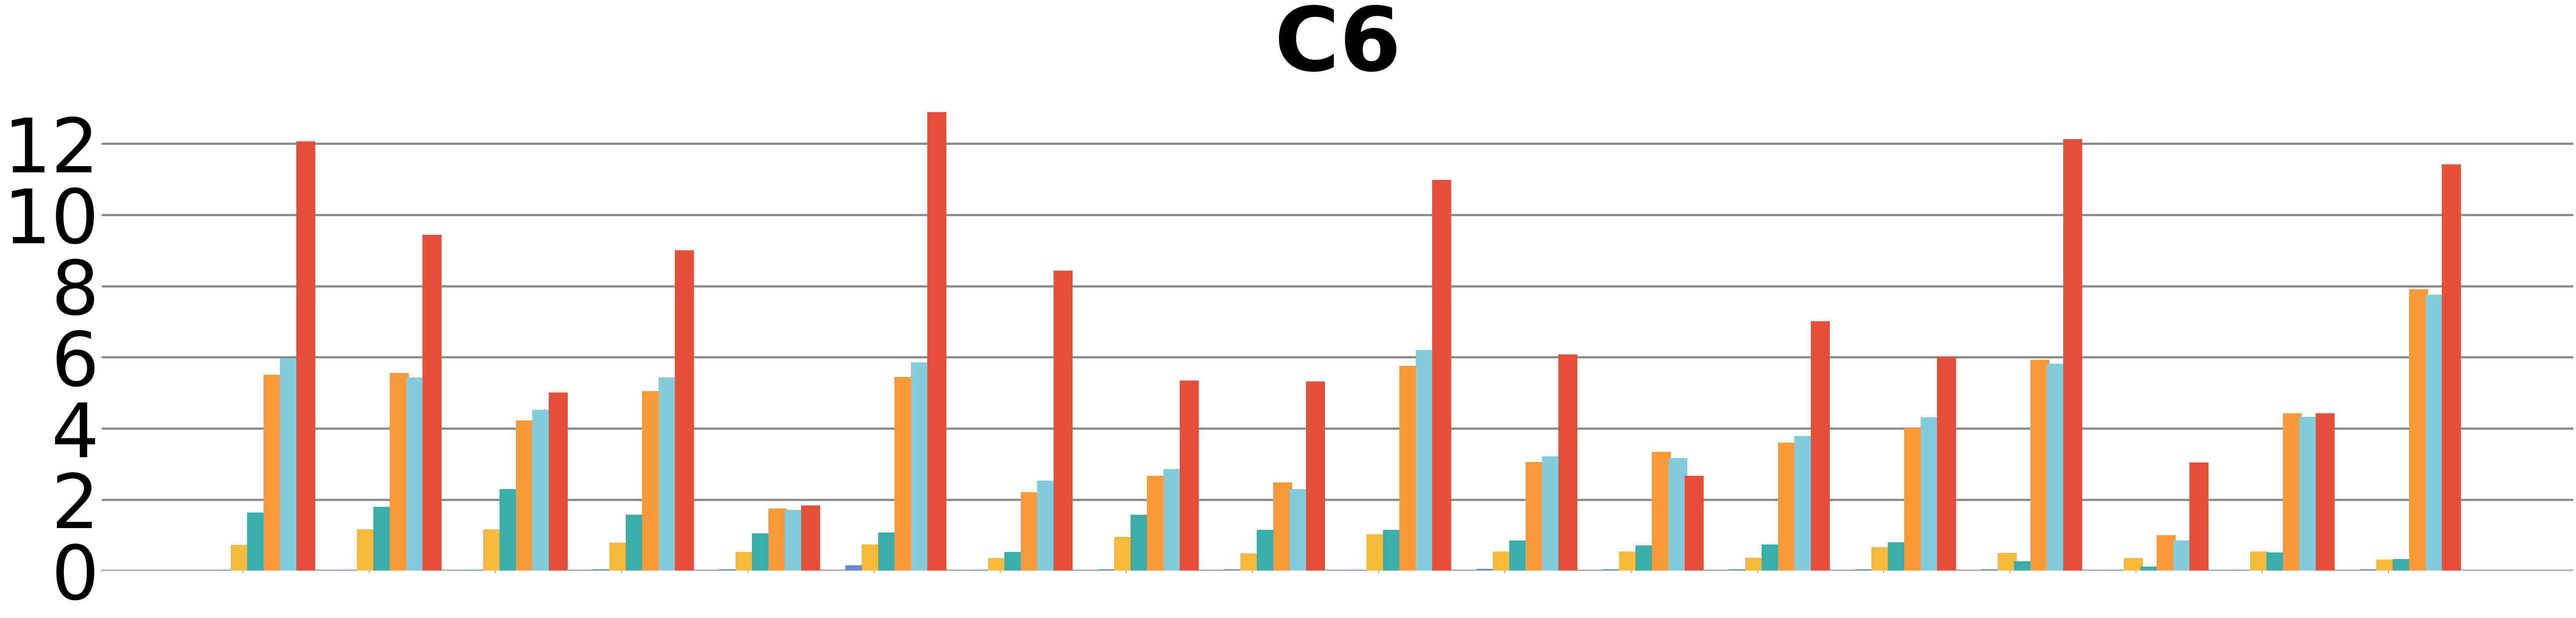

,BREAST,AML,COLORECTAL,LUNG,BRAIN,OV,SARCOMA,KIDNEY,LIVER,STOMACH,MELANOMA,PROSTATE,THYROID,UTERINE,HEAD&NECK,PANCREAS,CERVICAL,BLADDER
RP,0.031111,0.033333,0.033333,0.042222,0.043704,0.149630,0.030370,0.041481,0.037037,0.034074,0.048889,0.040741,0.037037,0.037037,0.037778,0.033333,0.033333,0.036296
PCA,0.720000,1.166667,1.166667,0.786667,0.526667,0.740000,0.346667,0.953333,0.493333,1.026667,0.540000,0.540000,0.366667,0.666667,0.500000,0.353333,0.533333,0.313333
ICA,1.633333,1.799259,2.288148,1.575556,1.054074,1.078519,0.520741,1.573333,1.144444,1.144444,0.845185,0.717778,0.741481,0.798519,0.267407,0.112593,0.515556,0.323704
AE,5.501481,5.559259,4.228148,5.042963,1.745185,5.442222,2.201481,2.664444,2.477778,5.756296,3.055556,3.340000,3.597037,4.005185,5.923704,0.997778,4.424444,7.905185
DAE,5.971111,5.427407,4.515556,5.432593,1.708148,5.851111,2.530370,2.856296,2.295556,6.201481,3.208889,3.171111,3.790370,4.314074,5.818519,0.847407,4.320000,7.757037
DeepProfile,12.066667,9.433333,5.006667,9.000000,1.833333,12.886667,8.426667,5.346667,5.320000,10.986667,6.080000,2.673333,7.006667,6.000000,12.120000,3.046667,4.426667,11.413333


In [10]:
result_df = createPlot('C6')
result_df

In [12]:
sub_df = result_df - result_df.loc['DeepProfile']
print(sub_df)
print(np.where(sub_df.values.flatten() > 0))

from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count = 88, 
                  nobs = 90, 
                  value = 0.5, 
                  alternative = 'larger')

                BREAST       AML  COLORECTAL      LUNG     BRAIN         OV  \
RP          -12.035556 -9.400000   -4.973333 -8.957778 -1.789630 -12.737037   
PCA         -11.346667 -8.266667   -3.840000 -8.213333 -1.306667 -12.146667   
ICA         -10.433333 -7.634074   -2.718519 -7.424444 -0.779259 -11.808148   
AE           -6.565185 -3.874074   -0.778519 -3.957037 -0.088148  -7.444444   
DAE          -6.095556 -4.005926   -0.491111 -3.567407 -0.125185  -7.035556   
DeepProfile   0.000000  0.000000    0.000000  0.000000  0.000000   0.000000   

              SARCOMA    KIDNEY     LIVER    STOMACH  MELANOMA  PROSTATE  \
RP          -8.396296 -5.305185 -5.282963 -10.952593 -6.031111 -2.632593   
PCA         -8.080000 -4.393333 -4.826667  -9.960000 -5.540000 -2.133333   
ICA         -7.905926 -3.773333 -4.175556  -9.842222 -5.234815 -1.955556   
AE          -6.225185 -2.682222 -2.842222  -5.230370 -3.024444  0.666667   
DAE         -5.896296 -2.490370 -3.024444  -4.785185 -2.871111  0.

(30.749168503170328, 6.272413389882242e-208)